In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df= pd.read_csv('train.csv')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             45211 non-null  int64 
 1   job             45211 non-null  object
 2   marital         45211 non-null  object
 3   education_qual  45211 non-null  object
 4   call_type       45211 non-null  object
 5   day             45211 non-null  int64 
 6   mon             45211 non-null  object
 7   dur             45211 non-null  int64 
 8   num_calls       45211 non-null  int64 
 9   prev_outcome    45211 non-null  object
 10  y               45211 non-null  object
dtypes: int64(4), object(7)
memory usage: 3.8+ MB


In [4]:
df

,age,job,marital,education_qual,call_type,day,mon,dur,num_calls,prev_outcome,y
0,58,management,married,tertiary,unknown,5,may,261,1,unknown,no
1,44,technician,single,secondary,unknown,5,may,151,1,unknown,no
2,33,entrepreneur,married,secondary,unknown,5,may,76,1,unknown,no
3,47,blue-collar,married,unknown,unknown,5,may,92,1,unknown,no
4,33,unknown,single,unknown,unknown,5,may,198,1,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,married,tertiary,cellular,17,nov,977,3,unknown,yes
45207,71,retired,divorced,primary,cellular,17,nov,456,2,unknown,yes
45208,72,retired,married,secondary,cellular,17,nov,1127,5,success,yes
45209,57,blue-collar,married,secondary,telephone,17,nov,508,4,unknown,no


**Data Cleaning**

In [5]:
df.shape

(45211, 11)

In [6]:
df.dtypes

age                int64
job               object
marital           object
education_qual    object
call_type         object
day                int64
mon               object
dur                int64
num_calls          int64
prev_outcome      object
y                 object
dtype: object

In [7]:
df.isnull().sum()

age               0
job               0
marital           0
education_qual    0
call_type         0
day               0
mon               0
dur               0
num_calls         0
prev_outcome      0
y                 0
dtype: int64

In [8]:
df.drop_duplicates()

,age,job,marital,education_qual,call_type,day,mon,dur,num_calls,prev_outcome,y
0,58,management,married,tertiary,unknown,5,may,261,1,unknown,no
1,44,technician,single,secondary,unknown,5,may,151,1,unknown,no
2,33,entrepreneur,married,secondary,unknown,5,may,76,1,unknown,no
3,47,blue-collar,married,unknown,unknown,5,may,92,1,unknown,no
4,33,unknown,single,unknown,unknown,5,may,198,1,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,married,tertiary,cellular,17,nov,977,3,unknown,yes
45207,71,retired,divorced,primary,cellular,17,nov,456,2,unknown,yes
45208,72,retired,married,secondary,cellular,17,nov,1127,5,success,yes
45209,57,blue-collar,married,secondary,telephone,17,nov,508,4,unknown,no


In [9]:
df.describe()

,age,day,dur,num_calls
count,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,15.806419,258.163080,2.763841
std,10.618762,8.322476,257.527812,3.098021
min,18.000000,1.000000,0.000000,1.000000
25%,33.000000,8.000000,103.000000,1.000000
50%,39.000000,16.000000,180.000000,2.000000
75%,48.000000,21.000000,319.000000,3.000000
max,95.000000,31.000000,4918.000000,63.000000


In [10]:
df['job'].value_counts()

blue-collar      9732
management       9458
technician       7597
admin.           5171
services         4154
retired          2264
self-employed    1579
entrepreneur     1487
unemployed       1303
housemaid        1240
student           938
unknown           288
Name: job, dtype: int64

In [11]:
df['job']=df['job'].replace('unknown',df['job'].mode()[0])

In [12]:
df['job'].value_counts()

blue-collar      10020
management        9458
technician        7597
admin.            5171
services          4154
retired           2264
self-employed     1579
entrepreneur      1487
unemployed        1303
housemaid         1240
student            938
Name: job, dtype: int64

In [13]:
df['marital'].value_counts()

married     27214
single      12790
divorced     5207
Name: marital, dtype: int64

In [14]:
df['education_qual'].value_counts()

secondary    23202
tertiary     13301
primary       6851
unknown       1857
Name: education_qual, dtype: int64

In [15]:
df['education_qual']=df['education_qual'].replace('unknown',df['education_qual'].mode()[0])

In [16]:
df['education_qual'].value_counts()

secondary    25059
tertiary     13301
primary       6851
Name: education_qual, dtype: int64

In [17]:
df['call_type'].value_counts()   #unknown values are high so imputation is not possible

cellular     29285
unknown      13020
telephone     2906
Name: call_type, dtype: int64

In [18]:
df['prev_outcome'].value_counts()  #unknown values are high and imputation is not possible so treat unknown as another category

unknown    36959
failure     4901
other       1840
success     1511
Name: prev_outcome, dtype: int64

In [19]:
df.isnull().sum()

age               0
job               0
marital           0
education_qual    0
call_type         0
day               0
mon               0
dur               0
num_calls         0
prev_outcome      0
y                 0
dtype: int64

In [20]:
df.y.value_counts()

no     39922
yes     5289
Name: y, dtype: int64

In [21]:
df.head()

,age,job,marital,education_qual,call_type,day,mon,dur,num_calls,prev_outcome,y
0,58,management,married,tertiary,unknown,5,may,261,1,unknown,no
1,44,technician,single,secondary,unknown,5,may,151,1,unknown,no
2,33,entrepreneur,married,secondary,unknown,5,may,76,1,unknown,no
3,47,blue-collar,married,secondary,unknown,5,may,92,1,unknown,no
4,33,blue-collar,single,secondary,unknown,5,may,198,1,unknown,no


In [22]:
df.describe()

,age,day,dur,num_calls
count,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,15.806419,258.163080,2.763841
std,10.618762,8.322476,257.527812,3.098021
min,18.000000,1.000000,0.000000,1.000000
25%,33.000000,8.000000,103.000000,1.000000
50%,39.000000,16.000000,180.000000,2.000000
75%,48.000000,21.000000,319.000000,3.000000
max,95.000000,31.000000,4918.000000,63.000000


In [23]:
iqr = df['age'].quantile(0.75) - df['age'].quantile(0.25)
upper_limit = df['age'].quantile(0.75) + (1.5 * iqr)
lower_limit = df['age'].quantile(0.25) + (1.5 * iqr)

lower_limit, upper_limit

(55.5, 70.5)

In [24]:
iqr = df['day'].quantile(0.75) - df['day'].quantile(0.25)
upper_limit = df['day'].quantile(0.75) + (1.5 * iqr)
lower_limit = df['day'].quantile(0.25) + (1.5 * iqr)

lower_limit, upper_limit

(27.5, 40.5)

In [25]:
iqr = df['dur'].quantile(0.75) - df['dur'].quantile(0.25)
upper_limit = df['dur'].quantile(0.75) + (1.5 * iqr)
lower_limit = df['dur'].quantile(0.25) + (1.5 * iqr)

lower_limit, upper_limit

(427.0, 643.0)

In [26]:
df['dur'] = df['dur'].clip(lower_limit, upper_limit)

In [27]:
iqr = df['num_calls'].quantile(0.75) - df['num_calls'].quantile(0.25)
upper_limit = df['num_calls'].quantile(0.75) + (1.5 * iqr)
lower_limit = df['num_calls'].quantile(0.25) + (1.5 * iqr)

lower_limit, upper_limit

(4.0, 6.0)

In [28]:
df['num_calls'] = df['num_calls'].clip(lower_limit, upper_limit)

In [29]:
df.describe()

,age,day,dur,num_calls
count,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,15.806419,450.297251,4.231669
std,10.618762,8.322476,62.029167,0.608818
min,18.000000,1.000000,427.000000,4.000000
25%,33.000000,8.000000,427.000000,4.000000
50%,39.000000,16.000000,427.000000,4.000000
75%,48.000000,21.000000,427.000000,4.000000
max,95.000000,31.000000,643.000000,6.000000


In [30]:
df['target']=df.y.map({'yes': 1, 'no' : 0})

In [31]:
df.head()

,age,job,marital,education_qual,call_type,day,mon,dur,num_calls,prev_outcome,y,target
0,58,management,married,tertiary,unknown,5,may,427.0,4.0,unknown,no,0
1,44,technician,single,secondary,unknown,5,may,427.0,4.0,unknown,no,0
2,33,entrepreneur,married,secondary,unknown,5,may,427.0,4.0,unknown,no,0
3,47,blue-collar,married,secondary,unknown,5,may,427.0,4.0,unknown,no,0
4,33,blue-collar,single,secondary,unknown,5,may,427.0,4.0,unknown,no,0


**EDA**

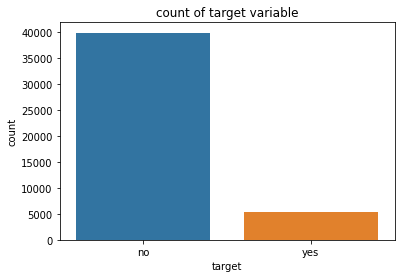

In [32]:
sns.countplot(x=df.y,data=df)
plt.xlabel('target')
plt.title('count of target variable')
plt.show()

<Axes: ylabel='job'>

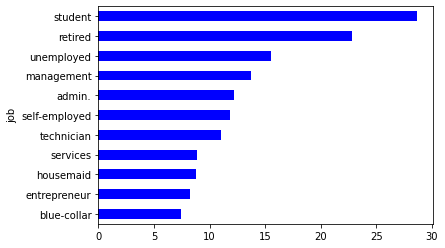

In [33]:
(df.groupby('job')['target'].mean()*100).sort_values().plot(kind='barh', color='blue')

<Axes: ylabel='education_qual'>

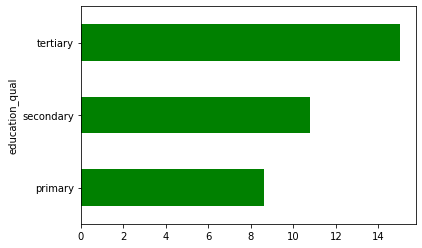

In [34]:
(df.groupby('education_qual')['target'].mean()*100).sort_values().plot(kind='barh', color='green')

<Axes: ylabel='marital'>

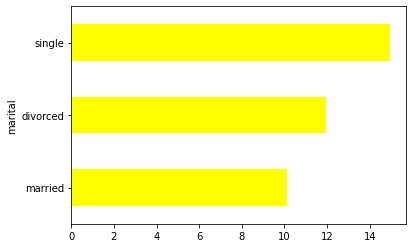

In [35]:
(df.groupby('marital')['target'].mean()*100).sort_values().plot(kind='barh', color='yellow')

<Axes: ylabel='call_type'>

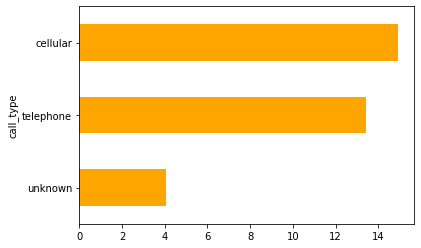

In [36]:
(df.groupby('call_type')['target'].mean()*100).sort_values().plot(kind='barh', color='orange')

<Axes: ylabel='mon'>

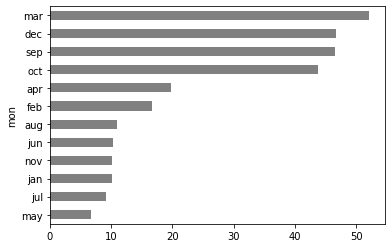

In [37]:
(df.groupby('mon')['target'].mean()*100).sort_values().plot(kind='barh', color='grey')

<Axes: ylabel='prev_outcome'>

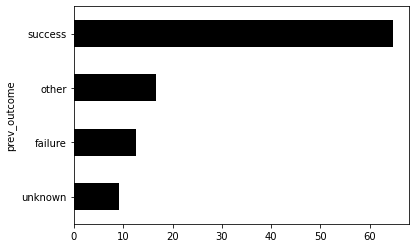

In [38]:
(df.groupby('prev_outcome')['target'].mean()*100).sort_values().plot(kind='barh', color='black')

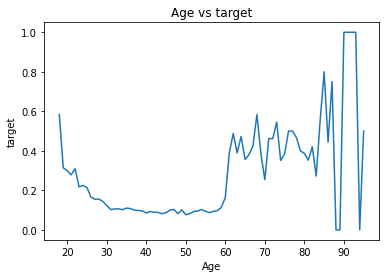

,age,target
age,1.000000,0.025155
target,0.025155,1.000000


In [39]:
df.groupby('age')['target'].mean().plot()
import matplotlib.pyplot as plt
#plt.title('Tax vs consumption')df.plot(x='age', y='target', style='o')
plt.title('Age vs target')
plt.xlabel('Age')
plt.ylabel('target')
plt.show()
df[['age','target']].corr()

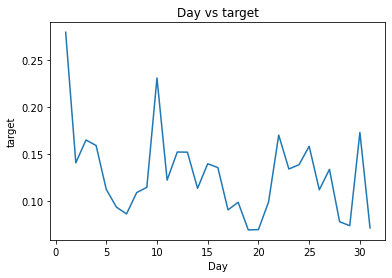

,day,target
day,1.000000,-0.028348
target,-0.028348,1.000000


In [40]:
df.groupby('day')['target'].mean().plot()
#df.plot(x='day', y='target', style='o')
plt.title('Day vs target')
plt.xlabel('Day')
plt.ylabel('target')
plt.show()
df[['day','target']].corr()

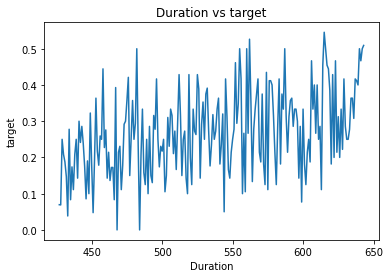

,dur,target
dur,1.000000,0.372842
target,0.372842,1.000000


In [41]:
df.groupby('dur')['target'].mean().plot()
#df.plot(x='dur', y='target', style='o')
plt.title('Duration vs target')
plt.xlabel('Duration')
plt.ylabel('target')
plt.show()
df[['dur','target']].corr()

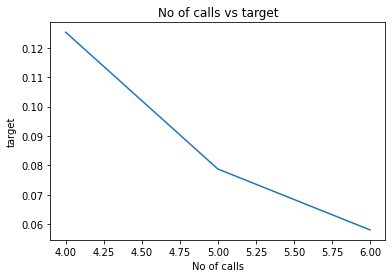

,num_calls,target
num_calls,1.000000,-0.065596
target,-0.065596,1.000000


In [42]:
df.groupby('num_calls')['target'].mean().plot()
#df.plot(x='num_calls', y='target', style='o')
plt.title('No of calls vs target')
plt.xlabel('No of calls')
plt.ylabel('target')
plt.show()
df[['num_calls','target']].corr()

**Encoding**

In [43]:
df.job.value_counts()

blue-collar      10020
management        9458
technician        7597
admin.            5171
services          4154
retired           2264
self-employed     1579
entrepreneur      1487
unemployed        1303
housemaid         1240
student            938
Name: job, dtype: int64

In [44]:
df['job']=df['job'].map({'student':11,'retired':10,'unemployed':9,'management':8,'admin.':7,'self-employed':6,'technician':5,'services':4,'housemaid':3,'entrepreneur':2,'blue-collar':1})
df

,age,job,marital,education_qual,call_type,day,mon,dur,num_calls,prev_outcome,y,target
0,58,8,married,tertiary,unknown,5,may,427.0,4.0,unknown,no,0
1,44,5,single,secondary,unknown,5,may,427.0,4.0,unknown,no,0
2,33,2,married,secondary,unknown,5,may,427.0,4.0,unknown,no,0
3,47,1,married,secondary,unknown,5,may,427.0,4.0,unknown,no,0
4,33,1,single,secondary,unknown,5,may,427.0,4.0,unknown,no,0
...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,5,married,tertiary,cellular,17,nov,643.0,4.0,unknown,yes,1
45207,71,10,divorced,primary,cellular,17,nov,456.0,4.0,unknown,yes,1
45208,72,10,married,secondary,cellular,17,nov,643.0,5.0,success,yes,1
45209,57,1,married,secondary,telephone,17,nov,508.0,4.0,unknown,no,0


Job, marital, Call type and previous outcome are mutliclass categorical values and has no order so one hot encoding is used

In [45]:
df.marital.value_counts()

married     27214
single      12790
divorced     5207
Name: marital, dtype: int64

In [46]:
df['marital']=df['marital'].map({'married':0,'divorced':1,'single':2})

In [47]:
df.call_type.value_counts()

cellular     29285
unknown      13020
telephone     2906
Name: call_type, dtype: int64

In [48]:
df['call_type']=df['call_type'].map({'cellular':2,'telephone':1,'unknown':0})

In [49]:
df.prev_outcome.value_counts() 

unknown    36959
failure     4901
other       1840
success     1511
Name: prev_outcome, dtype: int64

In [50]:
df['prev_outcome']=df['prev_outcome'].map({'success':3,'other':2,'failure':1, 'unknown':0})

In [51]:
df.education_qual.value_counts()

secondary    25059
tertiary     13301
primary       6851
Name: education_qual, dtype: int64

In [52]:
# from sklearn.preprocessing import LabelEncoder
# label_enco=LabelEncoder()
# dfE['education_qual']=label_enco.fit_transform(dfE['education_qual'])
# dfE

df['education_qual']=df['education_qual'].map({'tertiary':2,'secondary':1,'primary':0})
df


,age,job,marital,education_qual,call_type,day,mon,dur,num_calls,prev_outcome,y,target
0,58,8,0,2,0,5,may,427.0,4.0,0,no,0
1,44,5,2,1,0,5,may,427.0,4.0,0,no,0
2,33,2,0,1,0,5,may,427.0,4.0,0,no,0
3,47,1,0,1,0,5,may,427.0,4.0,0,no,0
4,33,1,2,1,0,5,may,427.0,4.0,0,no,0
...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,5,0,2,2,17,nov,643.0,4.0,0,yes,1
45207,71,10,1,0,2,17,nov,456.0,4.0,0,yes,1
45208,72,10,0,1,2,17,nov,643.0,5.0,3,yes,1
45209,57,1,0,1,1,17,nov,508.0,4.0,0,no,0


In [53]:
df.mon.value_counts()

may    13766
jul     6895
aug     6247
jun     5341
nov     3970
apr     2932
feb     2649
jan     1403
oct      738
sep      579
mar      477
dec      214
Name: mon, dtype: int64

In [54]:
# from sklearn.preprocessing import LabelEncoder
# Label_enco=LabelEncoder()
# #Label encoder knows how to understand word lables
# dfE['mon']=Label_enco.fit_transform(dfE['mon'])

#For manual implementation use map function
df['mon']=df['mon'].map({'mar': 1, 'dec':2,'sep':3,'oct':4,'apr':5,'feb':6,'aug':7,'jun':8,'nov':9,'jan':10,'jul':11,'may':12})
df

,age,job,marital,education_qual,call_type,day,mon,dur,num_calls,prev_outcome,y,target
0,58,8,0,2,0,5,12,427.0,4.0,0,no,0
1,44,5,2,1,0,5,12,427.0,4.0,0,no,0
2,33,2,0,1,0,5,12,427.0,4.0,0,no,0
3,47,1,0,1,0,5,12,427.0,4.0,0,no,0
4,33,1,2,1,0,5,12,427.0,4.0,0,no,0
...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,5,0,2,2,17,9,643.0,4.0,0,yes,1
45207,71,10,1,0,2,17,9,456.0,4.0,0,yes,1
45208,72,10,0,1,2,17,9,643.0,5.0,3,yes,1
45209,57,1,0,1,1,17,9,508.0,4.0,0,no,0


In [55]:
df.target.value_counts()

0    39922
1     5289
Name: target, dtype: int64

88% data are having one class so we need to balance the data

In [56]:
df1=df

**Splitting the dataset**

In [57]:
x = df[['age', 'job', 'marital',	'education_qual', 'call_type',	'day',	'mon',	'dur',	'num_calls',	'prev_outcome']].values
x1= df.loc[:,['age', 'job', 'marital',	'education_qual', 'call_type',	'day',	'mon',	'dur',	'num_calls',	'prev_outcome']]
y = df['target'].values
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.3, random_state=125)

In [58]:
x1.columns

Index(['age', 'job', 'marital', 'education_qual', 'call_type', 'day', 'mon',
       'dur', 'num_calls', 'prev_outcome'],
      dtype='object')

**Balancing the data using SOMTENN**

In [59]:
!pip install imblearn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [60]:
import imblearn

In [61]:
df.isnull().sum()

age               0
job               0
marital           0
education_qual    0
call_type         0
day               0
mon               0
dur               0
num_calls         0
prev_outcome      0
y                 0
target            0
dtype: int64

In [62]:
# def plot_2d_space(X, y, label='Classes'):   
#     colors = ['#1F77B4', '#FF7F0E']
#     markers = ['o', 's']
#     for l, c, m in zip(np.unique(y), colors, markers):
#         plt.scatter(
#             X[y==l, 0],
#             X[y==l, 1],
#             c=c, label=l, marker=m
#         )
#     plt.title(label)
#     plt.legend(loc='upper right')
#     plt.show()

x_train.shape, y_train.shape


((31647, 10), (31647,))

In [63]:
from imblearn.combine import SMOTEENN

smt = SMOTEENN(sampling_strategy='all')
x_smt, y_smt = smt.fit_resample(x_train, y_train)   #Balance the data using SMOTENN method


In [64]:
len(x_smt),len(y_smt)

(48664, 48664)

In [65]:
y_smt.shape

(48664,)

In [66]:
x_test

array([[ 33.,   7.,   0., ..., 427.,   6.,   0.],
       [ 49.,   6.,   0., ..., 427.,   4.,   0.],
       [ 55.,   4.,   0., ..., 427.,   4.,   0.],
       ...,
       [ 26.,   1.,   2., ..., 427.,   5.,   0.],
       [ 53.,   8.,   1., ..., 427.,   4.,   0.],
       [ 67.,  10.,   0., ..., 427.,   4.,   0.]])

In [67]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
x_train = scaler.fit_transform(x_smt)
x_test = scaler.transform(x_test)

**Modelling - Logistic Regression**

In [68]:
from sklearn.linear_model import LogisticRegression
logistic=LogisticRegression()
logistic.fit(x_train,y_smt)
y_pred1=logistic.predict(x_test)

In [69]:
from sklearn.metrics import accuracy_score, confusion_matrix, f1_score, roc_auc_score
# confusion_matrix(y_test,y_pred1)
# f1_score(y_test,y_pred1) # f1 score
# logistic_regression.score(X_test,y_test)
log_score=roc_auc_score(y_test, logistic.predict_proba(x_test)[:,1]) #AUROC
#accuracy_score(y_test,y_pred1) #accuracy
log_score

0.8658907674914615

In [70]:
logistic.score(x_test,y_test)

0.7582571512828075

**KNN**

In [71]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score, StratifiedKFold

skf = StratifiedKFold(n_splits=5, shuffle=True,random_state=125)

for i in [1,2,3,4,5,6,7,8,9,10,20,50]:
 knn = KNeighborsClassifier(i) #initialising the model
 knn.fit(x_train,y_smt) # training the model
 print("K value  : " , i, " train score : ", knn.score(x_train,y_smt) , " cv score : ", np.mean(cross_val_score(knn, x_train, y_smt, cv=skf, scoring = "roc_auc"))) #predicting using the model


K value  :  1  train score :  1.0  cv score :  0.9738855448290193
K value  :  2  train score :  0.9945544961367746  cv score :  0.9796292460115623
K value  :  3  train score :  0.984629294755877  cv score :  0.9825263469942531
K value  :  4  train score :  0.9816496794344896  cv score :  0.9838933701072975
K value  :  5  train score :  0.9749095840867993  cv score :  0.9844529542755149
K value  :  6  train score :  0.9718272234095019  cv score :  0.9844287251468922
K value  :  7  train score :  0.9680667433831991  cv score :  0.9843298989212675
K value  :  8  train score :  0.9641624198586224  cv score :  0.9839866760933113
K value  :  9  train score :  0.9617992766726944  cv score :  0.9836639468422538
K value  :  10  train score :  0.9581004438599375  cv score :  0.9829895976802792
K value  :  20  train score :  0.9338525398651981  cv score :  0.9780690053280917
K value  :  50  train score :  0.9103444024330101  cv score :  0.9688357615470308


In [72]:
knn=KNeighborsClassifier(5)
knn.fit(x_train,y_smt)
y_pred_knn=knn.predict(x_test)
knn.score(x_test,y_test)


0.8206281332940135

In [73]:
knn_score=roc_auc_score(y_test,knn.predict_proba(x_test)[:,1])
knn_score

0.8405221171115956

In [74]:
y_pred_ref=knn.predict_proba(x_test)

In [75]:
y_pred_ref

array([[1. , 0. ],
       [1. , 0. ],
       [1. , 0. ],
       ...,
       [1. , 0. ],
       [1. , 0. ],
       [0.2, 0.8]])

**Decision Tree**

In [76]:
from sklearn.tree import DecisionTreeClassifier
dtc=DecisionTreeClassifier()
dtc.fit(x_train,y_smt)
y_pred_dt=dtc.predict(x_test)
dtc.score(x_test,y_test)

0.8369212621645532

In [77]:
from sklearn.model_selection import StratifiedKFold

skf = StratifiedKFold(n_splits=5, shuffle=True,random_state=125)
for depth in [1,2,3,4,5,6,7,8,9,10,20,21,22,23,24,25,30,50]:
  dt=DecisionTreeClassifier(max_depth=depth)
  dt.fit(x_train,y_smt)
  train_auc=accuracy_score(y_smt,dt.predict(x_train))
  dt=DecisionTreeClassifier(max_depth=depth)
  roc_auc=np.mean(cross_val_score(dt,x_train,y_smt,cv=skf,scoring='roc_auc'))
  print("Depth : ", depth, "Training Accuracy : ", train_auc, "Cross_val_score : ",roc_auc)

Depth :  1 Training Accuracy :  0.7135459477231629 Cross_val_score :  0.735035960557503
Depth :  2 Training Accuracy :  0.8269357225053428 Cross_val_score :  0.8519510413255228
Depth :  3 Training Accuracy :  0.865547427256288 Cross_val_score :  0.9171744846132812
Depth :  4 Training Accuracy :  0.8897747821798455 Cross_val_score :  0.9399617609590283
Depth :  5 Training Accuracy :  0.9141048824593129 Cross_val_score :  0.9574204929348811
Depth :  6 Training Accuracy :  0.9329689298043728 Cross_val_score :  0.9649069742243824
Depth :  7 Training Accuracy :  0.9461819825743877 Cross_val_score :  0.972423489041814
Depth :  8 Training Accuracy :  0.9543605129048167 Cross_val_score :  0.9743194173241496
Depth :  9 Training Accuracy :  0.9598676639815881 Cross_val_score :  0.9750193260232969
Depth :  10 Training Accuracy :  0.9645117540687161 Cross_val_score :  0.9745869914905635
Depth :  20 Training Accuracy :  0.9975341114581621 Cross_val_score :  0.9660572863229993
Depth :  21 Training A

In [78]:
dtclass=DecisionTreeClassifier(max_depth=9)
dtclass.fit(x_train,y_smt)
y_pred_dt1=dtclass.predict(x_test)
dtclass.score(x_test,y_test)


0.8448097906222354

In [79]:
decisionTree_score = roc_auc_score(y_test,dtclass.predict_proba(x_test)[:,1])
decisionTree_score

0.8540040567980655

In [80]:
# Compute test set accuracy
acc = accuracy_score(y_test, y_pred_dt1)
print("Test set accuracy: {:.2f}".format(acc))
acc = roc_auc_score(y_test, y_pred_dt1)
print("Test set auc: {:.2f}".format(acc))


Test set accuracy: 0.84
Test set auc: 0.82


In [81]:
imp = list(dtclass.feature_importances_)

# List of tuples with variable and importance
feature_imp = [(feature, round(importance, 3)) for feature, importance in zip(x1.columns, imp)]

# Sort the feature importances by most important first
feature_imp = sorted(feature_imp, key = lambda x: x[1], reverse = True)

# Print out the feature and importances 
[print('Variable: {:20} Importance: {}'.format(*pair)) for pair in feature_imp];

Variable: mon                  Importance: 0.331
Variable: dur                  Importance: 0.327
Variable: prev_outcome         Importance: 0.156
Variable: day                  Importance: 0.091
Variable: call_type            Importance: 0.039
Variable: age                  Importance: 0.037
Variable: job                  Importance: 0.007
Variable: education_qual       Importance: 0.006
Variable: marital              Importance: 0.003
Variable: num_calls            Importance: 0.003


**Fitting the model with important features**

In [82]:
X=df1[['dur','prev_outcome','mon','day','call_type']].values #Duration, previous outcome, month, day,call_type are important features
Y=df1['target'].values 
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size=0.3, random_state=155)

In [83]:
X_train.shape, Y_train.shape

((31647, 5), (31647,))

In [84]:
from imblearn.combine import SMOTEENN
smt1 = SMOTEENN(sampling_strategy='all')
X_smt, Y_smt = smt1.fit_resample(X_train, Y_train)  

In [85]:
X_smt.shape, Y_train.shape

((37622, 5), (31647,))

In [86]:
from sklearn.tree import DecisionTreeClassifier
dtclass=DecisionTreeClassifier(max_depth=9)
dtclass.fit(X_smt,Y_smt)
y_pred_dt=dtclass.predict(X_test)
dtclass.score(X_test,Y_test)

0.8672220583898556

In [87]:
decisionTree_imp_score = roc_auc_score(Y_test,dtclass.predict_proba(X_test)[:,1])
decisionTree_imp_score

0.8242561736796997

[Text(0.42924182046979864, 0.95, 'x[0] <= 427.02\ngini = 0.47\nsamples = 37622\nvalue = [23395, 14227]'),
 Text(0.23589555369127516, 0.85, 'x[1] <= 2.002\ngini = 0.347\nsamples = 28916\nvalue = [22456, 6460]'),
 Text(0.13475251677852348, 0.75, 'x[2] <= 4.955\ngini = 0.236\nsamples = 25926\nvalue = [22374, 3552]'),
 Text(0.0549496644295302, 0.65, 'x[3] <= 1.045\ngini = 0.206\nsamples = 1705\nvalue = [199, 1506]'),
 Text(0.051593959731543626, 0.55, 'gini = 0.0\nsamples = 17\nvalue = [17, 0]'),
 Text(0.05830536912751678, 0.55, 'x[3] <= 4.004\ngini = 0.192\nsamples = 1688\nvalue = [182, 1506]'),
 Text(0.031879194630872486, 0.45, 'x[2] <= 2.951\ngini = 0.383\nsamples = 178\nvalue = [46, 132]'),
 Text(0.016778523489932886, 0.35, 'x[1] <= 0.069\ngini = 0.196\nsamples = 127\nvalue = [14, 113]'),
 Text(0.010067114093959731, 0.25, 'x[3] <= 2.181\ngini = 0.391\nsamples = 45\nvalue = [12, 33]'),
 Text(0.006711409395973154, 0.15, 'x[2] <= 1.539\ngini = 0.499\nsamples = 23\nvalue = [12, 11]'),
 Text

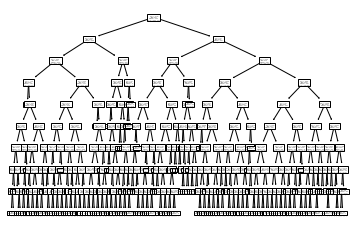

In [88]:
from sklearn import tree
tree.plot_tree(dtclass) 

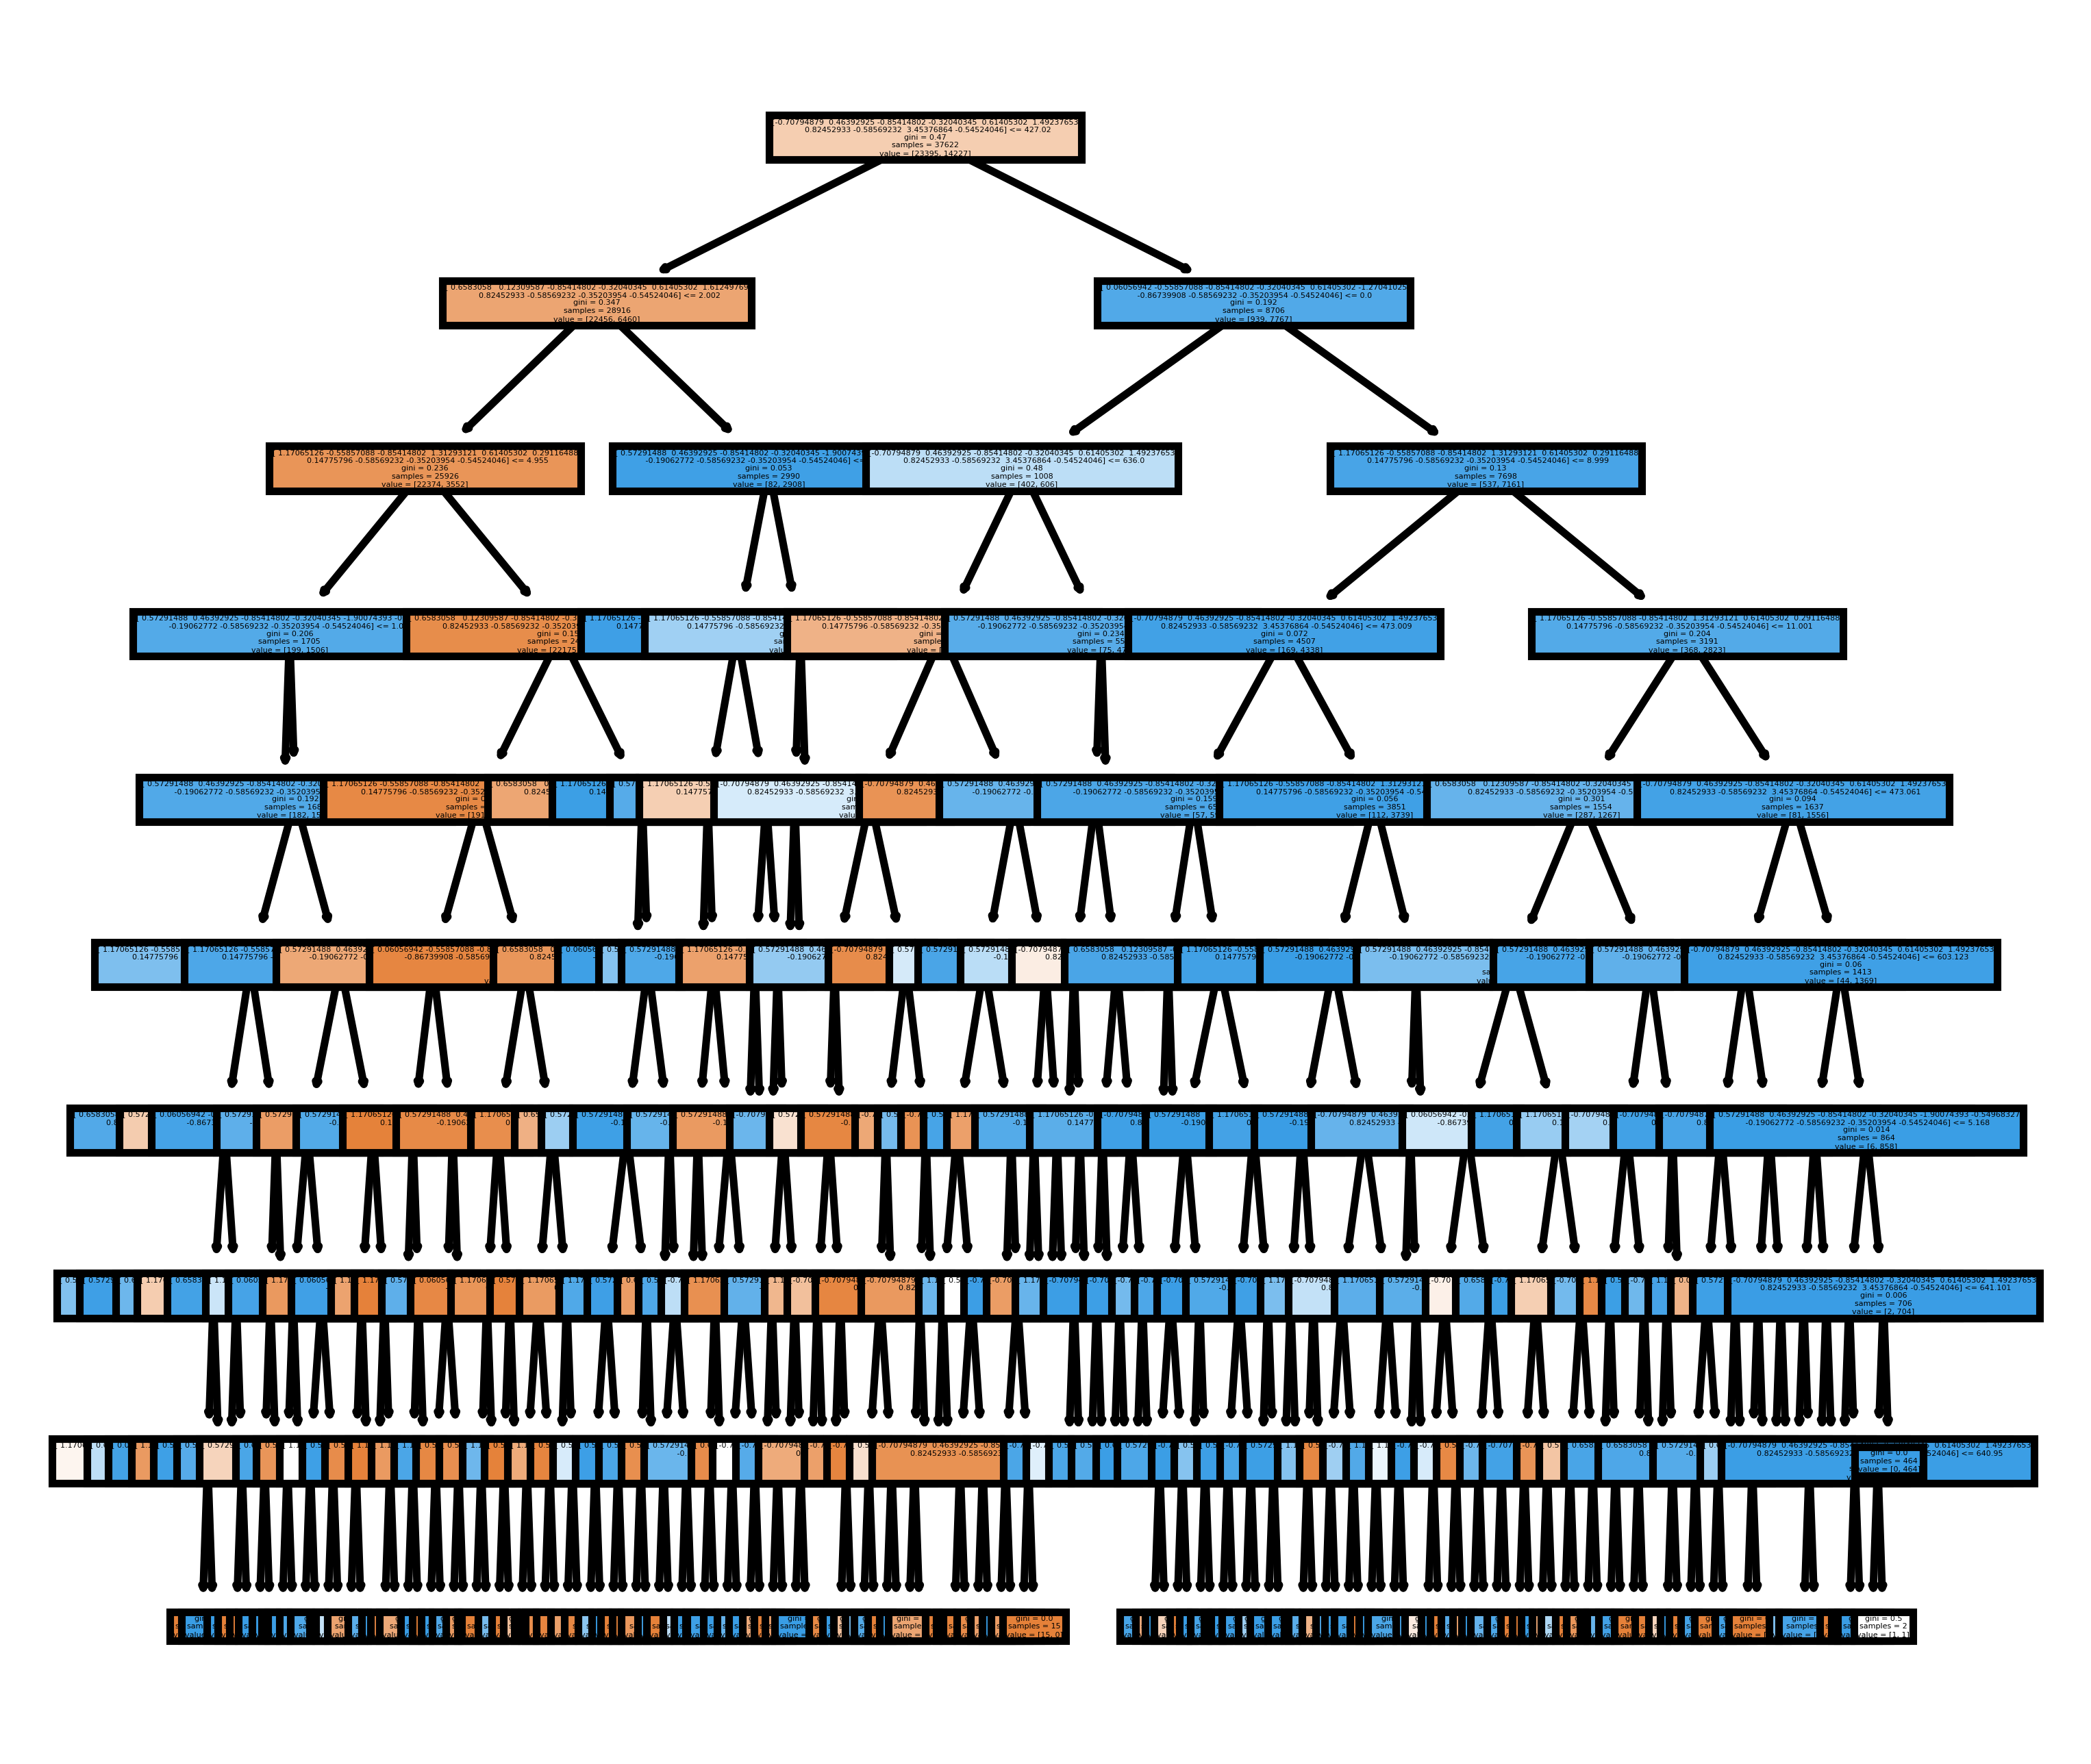

In [89]:
import matplotlib.pyplot as plt
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (4,4), dpi=800)
tree.plot_tree(dtclass, feature_names = x_test, filled = True);

**Random Forest**

In [90]:
from sklearn.ensemble import RandomForestClassifier
rfc=RandomForestClassifier(n_estimators=10, max_depth=3, max_features='sqrt')  #max_depth = sqrt of features

rfc.fit(x_train,y_smt)
y_pred_rf=rfc.predict(x_test)

In [91]:
randomForest_score=roc_auc_score(y_test, rfc.predict_proba(x_test)[:,1])
randomForest_score

0.8522996055239356

In [92]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test,y_pred_rf)

array([[8828, 3115],
       [ 272, 1349]])

In [94]:
imp_rfc = list(rfc.feature_importances_) # feature importances

# List of tuples with variable and importance
feature_imp_rfc = [(feature, round(importance, 3)) for feature, importance in zip(x1.columns, imp_rfc)]

# Sort the feature importances by most important first
feature_imp_rfc = sorted(feature_imp_rfc, key = lambda x: x[1], reverse = True)

# Print out the feature and importances 
[print('Variable: {:20} Importance: {}'.format(*pair)) for pair in feature_imp_rfc];

Variable: dur                  Importance: 0.467
Variable: call_type            Importance: 0.17
Variable: prev_outcome         Importance: 0.145
Variable: mon                  Importance: 0.084
Variable: marital              Importance: 0.042
Variable: education_qual       Importance: 0.036
Variable: num_calls            Importance: 0.024
Variable: age                  Importance: 0.023
Variable: job                  Importance: 0.01
Variable: day                  Importance: 0.0


**XG Boost**

In [95]:
skf= StratifiedKFold(n_splits=5, shuffle=True,random_state=125)

import xgboost as xgb
for lr in [0.01,0.02,0.03,0.04,0.05,0.06,0.1,0.11,0.12,0.17,0.2,0.21,0.22,0.23,0.25,0.3,0.4,0.5,0.7,0.8,0.9,1]:
  xg = xgb.XGBClassifier(learning_rate = lr, n_estimators=100, verbosity = 0) # initialise the model
  xg.fit(x_train,y_smt) #train the model
  xg.score(x_test, y_test)
  print("Learning rate : ", lr, " Train score : ", xg.score(x_train,y_smt), " Cross-Val score : ", np.mean(cross_val_score(xg, x_train, y_smt, cv=skf, scoring='roc_auc')))

Learning rate :  0.01  Train score :  0.9444147624527371  Cross-Val score :  0.98005975859851
Learning rate :  0.02  Train score :  0.9514630938681572  Cross-Val score :  0.9867546801384283
Learning rate :  0.03  Train score :  0.9599909584086799  Cross-Val score :  0.9902987415001807
Learning rate :  0.04  Train score :  0.9647377938517179  Cross-Val score :  0.9924536761172291
Learning rate :  0.05  Train score :  0.968210586881473  Cross-Val score :  0.9936653572393631
Learning rate :  0.06  Train score :  0.9708203189215847  Cross-Val score :  0.9945101336987742
Learning rate :  0.1  Train score :  0.9779713956929147  Cross-Val score :  0.9960686149937619
Learning rate :  0.11  Train score :  0.9796358704586553  Cross-Val score :  0.9962630403560965
Learning rate :  0.12  Train score :  0.979923557455203  Cross-Val score :  0.9964028548318347
Learning rate :  0.17  Train score :  0.9840539207627815  Cross-Val score :  0.9967202896706567
Learning rate :  0.2  Train score :  0.985101

In [101]:
xgbo=xgb.XGBClassifier(learning_rate =0.23, n_estimators = 10, verbosity=0)
xgbo.fit(x_train,y_smt)
xgbo.score(x_test,y_test)

0.8338248304335004

In [102]:
xgbo_score=roc_auc_score(y_test, xgbo.predict_proba(x_test)[:,1])
xgbo_score

0.8936536560176366

**Voting Classifier**

In [103]:
from sklearn.ensemble import VotingClassifier
model1=LogisticRegression()
model2=KNeighborsClassifier(5)
model3=tree.DecisionTreeClassifier(max_depth=9)
model4=xgb.XGBClassifier(learning_rate=0.4, n_estimators=10)
model5=RandomForestClassifier(n_estimators=10, max_depth=3, max_features='sqrt')
model=VotingClassifier(estimators=[('lr',model1),('knn',model2),('dt',model3),('XGB',model4),('rf',model5)],voting='soft')
model.fit(x_train,y_smt)
model.score(x_test,y_test)

0.8350781480389265

In [104]:
votingClassi_score=roc_auc_score(y_test, model.predict_proba(x_test)[:,1])
votingClassi_score

0.8950914695926359

In [105]:
pd.DataFrame({"Models":["Logistic Regression","KNN","Decision Tree","DT with imp features","Random Forest","XGBoost","Voting Classifier"], "Scores":[log_score,knn_score,decisionTree_score,decisionTree_imp_score,randomForest_score,xgbo_score,votingClassi_score]})

,Models,Scores
0,Logistic Regression,0.865891
1,KNN,0.840522
2,Decision Tree,0.854004
3,DT with imp features,0.824256
4,Random Forest,0.852300
5,XGBoost,0.893654
6,Voting Classifier,0.895091


Applied all ML algorithms and XGBooster gives better auroc score when compared to other ML algorithms.